In [2]:
# Importing the necessary Libraries 
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import statistics

import plotly.graph_objects as go 
import plotly.express as px 
%matplotlib inline

# Data 
## Import data


In [3]:
# To import/read the df_1 csv dataset
df1 = pd.read_csv(r'C:\Users\Admin\Desktop\REAL_ESTATE_PREDICTION\SergeMartin_HousePrice_Prediction\data_analysis\df1.csv')

In [5]:
# To check the head of the df_1 dataset
df1.head()

,ID,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchekType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,True,NaN,True,589.0,NaN,NaN


In [6]:
# To check the number of rows and columns
df1.shape

(21047, 35)

In [7]:
#To check some statistics
des_info = df1.describe().T
des_info['No. missing'] = df1.shape[0]-des_info['count'] 
#des_info['No. missing'] 
des_info


,count,mean,std,min,25%,50%,75%,max,No. missing
ID,21047.0,1.014885e+07,11541.858189,10128188.0,10139022.5,10149580.0,10157350.5,10168916.0,0.0
Price,19434.0,3.966239e+05,403465.788486,1385.0,230000.0,315000.0,445000.0,29650000.0,1613.0
NetHabitableSurface(msq),18086.0,1.604551e+02,222.093157,11.0,93.0,130.0,186.0,17842.0,2961.0
BedroomCount,20571.0,2.990229e+00,13.456484,1.0,2.0,3.0,3.0,1919.0,476.0
Floor,6544.0,3.009169e+00,17.840084,1.0,1.0,2.0,3.0,999.0,14503.0
SchoolDistance,16608.0,1.100870e+02,369.944464,0.0,0.0,0.0,0.0,9000.0,4439.0
ShopDistance,16608.0,9.721712e+01,572.958539,0.0,0.0,0.0,0.0,15000.0,4439.0
TransportDistance,16608.0,2.712482e+01,122.046176,0.0,0.0,0.0,0.0,3700.0,4439.0
NetHabitableSurface,18086.0,1.604551e+02,222.093157,11.0,93.0,130.0,186.0,17842.0,2961.0
TotalRoomCount,1355.0,6.740221e+00,4.171947,1.0,4.0,6.0,8.0,40.0,19692.0


In [8]:
#To get all the column names in the dataset
df1.columns    

Index(['ID', 'Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)',
       'BedroomCount', 'Province', 'locality', 'Region', 'PostCode', 'street',
       'Floor', 'RegionCode', 'IsIsolated', 'HasSeaView', 'SchoolDistance',
       'ShopDistance', 'TransportDistance', 'NetHabitableSurface',
       'TotalRoomCount', 'HasAttic', 'HasBasement', 'HasDiningRoom',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'HasLift',
       'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasBalcony',
       'HasGarden', 'GardenArea', 'KitchekType', 'LivingRoomArea'],
      dtype='object')

In [9]:
# STEP 1: Data Cleaning

# To count number of duplicate rows (1379 rows of duplicated)
print(df1.duplicated().sum())

1379


In [10]:

# Removal of duplicated rows (No duplicates)
df1 = df1.drop_duplicates(keep='last')
df1.shape

(19668, 35)

In [11]:
#To Check for Missing Values

#To check the percentage of missing values per column in the dataset
df1_percent_missing = df1.isnull().sum() * 100 / len(df1)
df1_percent_missing

ID                            0.000000
Type                          0.000000
Sub type                      0.000000
Price                         7.407972
NetHabitableSurface(msq)     14.317673
BedroomCount                  2.298149
Province                      3.543828
locality                      0.000000
Region                        3.543828
PostCode                      0.000000
street                       20.962986
Floor                        68.944478
RegionCode                    3.543828
IsIsolated                   70.490136
HasSeaView                   99.933903
SchoolDistance               20.510474
ShopDistance                 20.510474
TransportDistance            20.510474
NetHabitableSurface          14.317673
TotalRoomCount               93.751271
HasAttic                     87.182225
HasBasement                  60.555217
HasDiningRoom                83.572300
BuildingCondition            33.562131
ConstructionYear             43.771609
FacadeCount              

In [32]:
# Creating a New Dataset(df2)

# Drop/Remove Columns which are not needed and with morethen 65% missingness (14 columns were dropped)
df2 = df1.drop(['IsDoubleGlaze','Sub type','IsIsolated','LivingRoomArea','Floor','ShopDistance','TransportDistance','RegionCode','HasAttic','HasLift','FloodZoneType','HasDiningRoom','GardenArea','HasBalcony','HasSeaView','hasSwimmingpool','SchoolDistance','TotalRoomCount','FloodZoneType','FacadeCount','HasSeaView ','propertySubtype', 'atticSurface', 'diningroomSurface', 'rooms', 'floors'], axis=1, errors='ignore')
df2.head()

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
0,10128188,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Sparrenweg,148.0,NaN,NaN,NaN,NaN,True,NaN
1,10128189,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN
2,10128190,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN
3,10128191,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN
4,10128192,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN


In [33]:
# Data rows/columns after dropping unwanted columns HasBalcony
df2.shape

(19668, 17)

In [34]:
df2.BuildingCondition.unique()

array([nan, 'GOOD', 'AS_NEW', 'TO_RENOVATE', 'TO_BE_DONE_UP',
       'JUST_RENOVATED', 'TO_RESTORE'], dtype=object)

In [35]:
# To display all columns withing the dataset
pd.set_option("display.max_columns", None)
df2.head()

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
0,10128188,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Sparrenweg,148.0,NaN,NaN,NaN,NaN,True,NaN
1,10128189,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN
2,10128190,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN
3,10128191,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN
4,10128192,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,NaN,NaN,NaN,NaN,True,NaN


In [36]:
df2.columns

Index(['ID', 'Type', 'Price', 'NetHabitableSurface(msq)', 'BedroomCount',
       'Province', 'locality', 'Region', 'PostCode', 'street',
       'NetHabitableSurface', 'HasBasement', 'BuildingCondition',
       'ConstructionYear', 'HeatingType', 'HasGarden', 'KitchekType'],
      dtype='object')

In [38]:
# Replacing cells with NaN with 0 in columns
df2 = df2.replace(np.nan, 0)
df2.head()

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,HasGarden,KitchekType
0,10128188,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Sparrenweg,148.0,0,0,0.0,0,True,0
1,10128189,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,True,0
2,10128190,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,True,0
3,10128191,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,True,0
4,10128192,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,True,0


In [39]:
#df2.HeatingType.unique()
df2.Region.unique()

array(['Flanders', 'Wallonie', 'Brussels', 0], dtype=object)

In [ ]:
# Converting the HeatingType column to numeric  
df2.replace({"HeatingType":{'GAS':1}},inplace=True) 
df2.replace({"HeatingType":{'FUELOIL':2}},inplace=True)
df2.replace({"HeatingType":{'ELECTRIC':3}},inplace=True)
df2.tail()

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,IsDoubleGlaze,HasGarden,KitchekType
21042,10168909,0,398000.0,145.0,3.0,Flemish Brabant,Kessel-Lo,Flanders,3010,Guldensporenlaan,145.0,1,0,1962.0,2,0,1,INSTALLED
21043,10168911,1,219000.0,95.0,2.0,West Flanders,Brugge,Flanders,8000,Hoefijzerlaan,95.0,0,AS_NEW,0.0,0,1,0,0
21044,10168913,0,345000.0,166.0,3.0,Antwerp,Schriek,Flanders,2223,Tuindijk,166.0,0,0,1966.0,1,1,0,HYPER_EQUIPPED
21045,10168914,0,375000.0,0.0,3.0,West Flanders,Oostkamp,Flanders,8020,Guido Gezellestraat,0.0,0,TO_BE_DONE_UP,1971.0,0,0,1,0
21046,10168916,0,129000.0,144.0,4.0,West Flanders,Menen,Flanders,8930,Gen. Lemanstraat,144.0,0,0,0.0,0,1,0,0


In [ ]:
# Converting the BuildingCondition column to numeric  
#df2.replace({"BuildingCondition":{"BLANKS":0}},inplace=True)
df2.replace({"BuildingCondition":{"AS_NEW":1}},inplace=True)
df2.replace({"BuildingCondition":{"GOOD": 2}},inplace=True)
df2.replace({"BuildingCondition":{"JUST_RENOVATED":3}},inplace=True)
df2.replace({"BuildingCondition":{"TO_BE_DONE_UP":4}},inplace=True)
df2.replace({"BuildingCondition":{"TO_RENOVATE":5}},inplace=True)
df2.replace({"BuildingCondition":{"TO_RESTORE":5}},inplace=True)


df2.tail()

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,IsDoubleGlaze,HasGarden,KitchekType
21042,10168909,0,398000.0,145.0,3.0,Flemish Brabant,Kessel-Lo,Flanders,3010,Guldensporenlaan,145.0,1,0,1962.0,2,0,1,INSTALLED
21043,10168911,1,219000.0,95.0,2.0,West Flanders,Brugge,Flanders,8000,Hoefijzerlaan,95.0,0,1,0.0,0,1,0,0
21044,10168913,0,345000.0,166.0,3.0,Antwerp,Schriek,Flanders,2223,Tuindijk,166.0,0,0,1966.0,1,1,0,HYPER_EQUIPPED
21045,10168914,0,375000.0,0.0,3.0,West Flanders,Oostkamp,Flanders,8020,Guido Gezellestraat,0.0,0,4,1971.0,0,0,1,0
21046,10168916,0,129000.0,144.0,4.0,West Flanders,Menen,Flanders,8930,Gen. Lemanstraat,144.0,0,0,0.0,0,1,0,0


In [ ]:
# Converting the KitchenType column to numeric
df2.replace({"KitchekType":{"INSTALLED":1}},inplace=True)
df2.replace({"KitchekType":{"HYPER_EQUIPPED":2}},inplace=True)
df2.replace({"KitchekType":{"USA_HYPER_EQUIPPED":3}},inplace=True)
df2.replace({"KitchekType":{"HYPER_EQUIPPED":4}},inplace=True)
df2.replace({"KitchekType":{"NOT_INSTALLED":5}},inplace=True)
df2.replace({"KitchekType":{"SEMI_EQUIPPED":6}},inplace=True)



df2.Province.unique()

array(['Limburg', 'Antwerp', 'Liège', 'Brussels', 'East Flanders',
       'Namur', 0, 'Flemish Brabant', 'Hainaut', 'West Flanders',
       'Walloon Brabant', 'Luxembourg'], dtype=object)

In [ ]:
# Checking the Percentage of Mising Value again (No Missing Values found)
df2_percent_missing = df2.isnull().sum() * 100 / len(df2)
df2_percent_missing

ID                          0.0
Type                        0.0
Price                       0.0
NetHabitableSurface(msq)    0.0
BedroomCount                0.0
Province                    0.0
locality                    0.0
Region                      0.0
PostCode                    0.0
street                      0.0
NetHabitableSurface         0.0
HasBasement                 0.0
BuildingCondition           0.0
ConstructionYear            0.0
HeatingType                 0.0
IsDoubleGlaze               0.0
HasGarden                   0.0
KitchekType                 0.0
dtype: float64

In [ ]:
# to summarize the number of rows/columns in the dataset and create dataset df3
df3 = df2
df3.shape

(19668, 18)

In [ ]:
## Step 2: Data Analysis (using df3 dataset)

# Univariate data Exploration of some Variables
# Checking the distribution of the price(shows that the price variable is skewed to the right)


<AxesSubplot: ylabel='Frequency'>

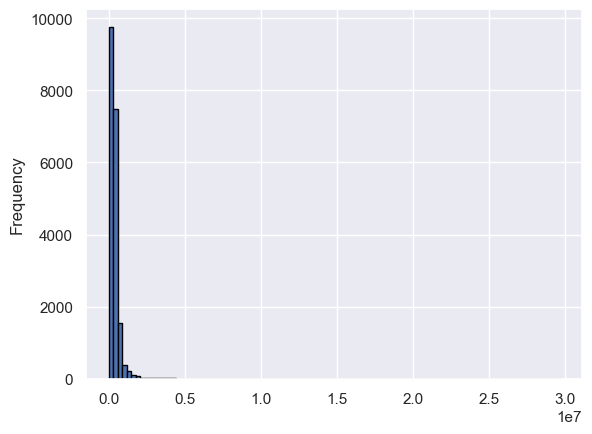

In [ ]:
#plotting the Price column using histogram to assess the shape and distribution of the variable

df3['Price'].plot(kind='hist', bins=100, edgecolor='black')


In [ ]:
#plot distribution of values in Price column
fig = go.Figure()
fig.add_trace(go.Histogram(x=df1[df1.Type == 'HOUSE'].Price.values,name='House price'))
fig.add_trace(go.Histogram(x=df1[df1.Type == 'APARTMENT'].Price.values,name='Apartment price'))

<AxesSubplot: >

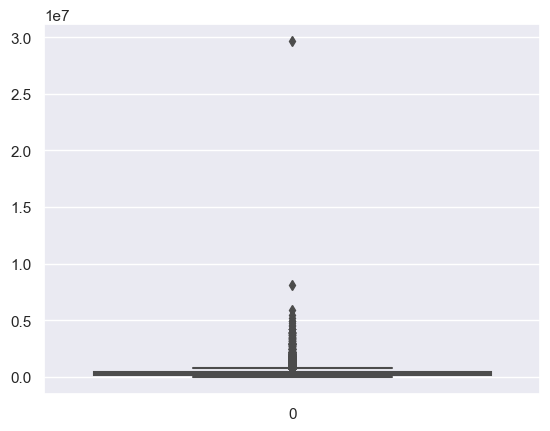

In [ ]:
# TO Identify Outliers from the price variable

sns.boxplot(df3['Price'])

In [ ]:
# Just for an overview of the price column
df3[['Price']].describe()

,Price
count,1.966800e+04
mean,3.665264e+05
std,4.051436e+05
min,0.000000e+00
25%,2.050000e+05
50%,2.980000e+05
75%,4.250000e+05
max,2.965000e+07


In [ ]:
# Lower and Upper Quantiles

df3['Price'].quantile(0.25)
df3['Price'].quantile(0.75)

425000.0

In [ ]:
# Removal of Outlier frm the Price Variable using the IQR Technique

def outliers(df3, feature):
    Q1= df3[feature].quantile(0.25)
    Q3 = df3[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(df3, "Price")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)


# anything lying outside between  755000.0 and 755000.0 is an outlier.

Upper whisker:  755000.0
Lower Whisker:  -125000.0


In [ ]:

df3[(df3['Price'] < lower) | (df3['Price'] > upper)]

# These are the outliers lying beyond the upper and 
# lower limit computed with the IQR method
# Total of 1,293 rows were detected as outliers

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,IsDoubleGlaze,HasGarden,KitchekType
5,10128193,0,1295000.0,650.0,5.0,Antwerp,Berlaar,Flanders,2590,Markt,650.0,1,2,0.0,1,1,0,1
23,10128224,1,795000.0,220.0,4.0,Brussels,Etterbeek,Brussels,1040,Avenue de Tervuren,220.0,0,1,1950.0,0,1,0,1
27,10128233,0,1295000.0,425.0,5.0,Brussels,Saint-Gilles,Brussels,1060,0,425.0,0,2,0.0,0,0,1,0
48,10128295,0,895000.0,444.0,4.0,Antwerp,Retie,Flanders,2470,Begonialaan,444.0,1,4,1993.0,1,1,0,0
58,10128367,0,850000.0,315.0,8.0,Antwerp,Antwerp,Flanders,2000,Kapucinessenstraat,315.0,0,4,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21002,10168856,0,895000.0,0.0,6.0,Antwerp,Brasschaat,Flanders,2930,Bredabaan,0.0,0,0,0.0,0,1,0,0
21015,10168877,0,798252.0,199.0,3.0,West Flanders,Sijsele,Flanders,8340,0,199.0,0,0,0.0,0,1,0,2
21016,10168878,0,852996.0,241.0,3.0,West Flanders,Brugge,Flanders,8000,0,241.0,0,0,0.0,0,1,0,2
21017,10168879,0,934362.0,241.0,1.0,West Flanders,Loppem,Flanders,8210,0,241.0,0,0,0.0,0,1,1,2


In [ ]:
# To remove these outliers from datasets and create a dataset df4
# So, this new data frame new_df contains the data that is between the upper and 
# lower limit as computed using the IQR method
# d

df4 = df3[(df3['Price'] > lower) & (df3['Price'] < upper)]

In [ ]:
# To check the shape of the dataset again after removal of outliers
# Using the IQR method, I found that there are 1,293 outliers in the dataset and removed
# df4 rows and column
df4.shape

(18374, 18)

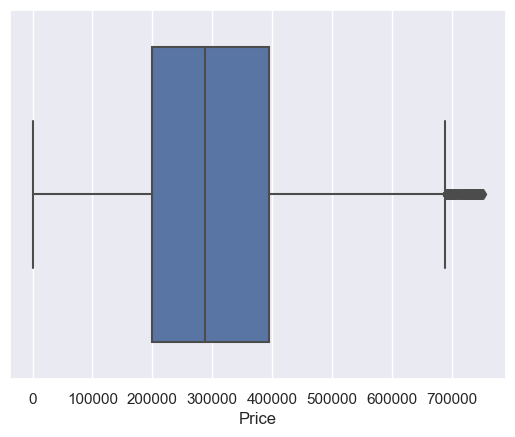

In [ ]:
# To check again for outlier
sns.boxplot(x = df4['Price'])
plt.show()

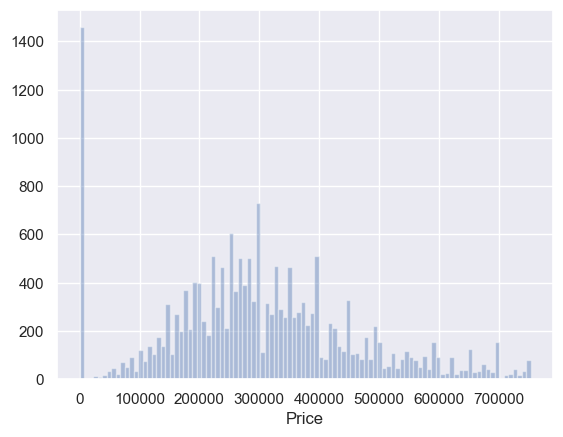

In [ ]:
sns.distplot(df4['Price'], bins=100, kde = False)
plt.show()

In [ ]:
df4.head()


,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,HeatingType,IsDoubleGlaze,HasGarden,KitchekType
0,10128188,0,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Sparrenweg,148.0,0,0,0.0,0,1,1,0
1,10128189,0,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,1,1,0
2,10128190,0,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,1,1,0
3,10128191,0,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,1,1,0
4,10128192,0,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,148.0,0,0,0.0,0,1,1,0


In [ ]:
# Bivariate Data Exploration 


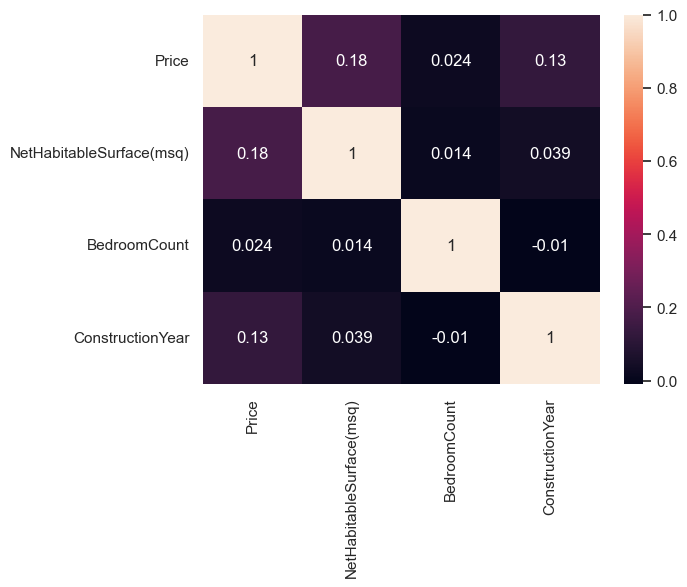

In [ ]:
# To check correction  of Price and for the continous variables using dataset df5
import matplotlib.pyplot as plt

df5 = pd.DataFrame(df4, columns=['Price','NetHabitableSurface(msq)', 'BedroomCount', 'ConstructionYear'])
matrix = df5.corr().round(3)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
# pairwise correlation coefficients between two or more (numeric) variables.
# To check correction for the continous variables using dataset df5
df5 = pd.DataFrame(df4, columns=['Price','NetHabitableSurface(msq)', 'BedroomCount', 'ConstructionYear'])
df5 = df5.corr()
round(df5,2)

,Price,NetHabitableSurface(msq),BedroomCount,ConstructionYear
Price,1.00,0.18,0.02,0.13
NetHabitableSurface(msq),0.18,1.00,0.01,0.04
BedroomCount,0.02,0.01,1.00,-0.01
ConstructionYear,0.13,0.04,-0.01,1.00


In [ ]:
# Check of crrelation

# NetHabitableSurface(msq)will deleted  or NetHabitableSurface because they are correlated to each other 
corr = df4.corr()
corr.style.background_gradient(cmap='coolwarm')

,ID,Type,Price,NetHabitableSurface(msq),BedroomCount,NetHabitableSurface,HasBasement,BuildingCondition,ConstructionYear,IsDoubleGlaze,HasGarden
ID,1.000000,-0.014115,-0.015903,0.012120,-0.003004,0.012120,-0.014695,-0.002168,0.001437,0.012122,0.001742
Type,-0.014115,1.000000,-0.225548,-0.141662,-0.053876,-0.141662,-0.062821,-0.233837,0.094309,0.039537,-0.330328
Price,-0.015903,-0.225548,1.000000,0.176808,0.023742,0.176808,0.022042,-0.031499,0.127656,0.107581,0.155627
NetHabitableSurface(msq),0.012120,-0.141662,0.176808,1.000000,0.013759,1.000000,0.047428,0.047970,0.038858,0.037180,0.098139
BedroomCount,-0.003004,-0.053876,0.023742,0.013759,1.000000,0.013759,0.018179,0.012112,-0.009742,0.005678,0.013303
NetHabitableSurface,0.012120,-0.141662,0.176808,1.000000,0.013759,1.000000,0.047428,0.047970,0.038858,0.037180,0.098139
HasBasement,-0.014695,-0.062821,0.022042,0.047428,0.018179,0.047428,1.000000,0.205674,0.014906,0.158367,0.053584
BuildingCondition,-0.002168,-0.233837,-0.031499,0.047970,0.012112,0.047970,0.205674,1.000000,0.002563,0.036129,0.103630
ConstructionYear,0.001437,0.094309,0.127656,0.038858,-0.009742,0.038858,0.014906,0.002563,1.000000,0.152877,0.071356
IsDoubleGlaze,0.012122,0.039537,0.107581,0.037180,0.005678,0.037180,0.158367,0.036129,0.152877,1.000000,0.063651


In [ ]:
corr_df = df4.corr()
corr_df['Price'].abs().sort_values(ascending=False)

Price                       1.000000
Type                        0.225548
NetHabitableSurface(msq)    0.176808
NetHabitableSurface         0.176808
HasGarden                   0.155627
ConstructionYear            0.127656
IsDoubleGlaze               0.107581
BuildingCondition           0.031499
BedroomCount                0.023742
HasBasement                 0.022042
ID                          0.015903
Name: Price, dtype: float64

In [ ]:
### To Subset data into house and appartment
df_house = df4[df1.Type=='HOUSE']
df_apart = df4[df1.Type=='APARTMENT']

In [ ]:
df4.Region.unique()

array(['Flanders', 'Wallonie', 'Brussels', 0], dtype=object)

In [ ]:
### Barplot of Region and Price for House and Apartment
 
fig = go.Figure()
fig.add_trace(go.Bar(x=df_house.Region,y=df_house.Price,name='House'))
fig.add_trace(go.Bar(x=df_apart.Region,y=df_apart.Price,name='Apartment'))
fig.update_xaxes(title_text = "Region")
fig.update_yaxes(title_text = "Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_house.groupby('Region')['Price'].mean().index,
                         y=df_house.groupby('Region')['Price'].mean().values,name='House'))
fig.add_trace(go.Scatter(x=df_apart.groupby('Region')['Price'].mean().index,
                         y=df_apart.groupby('Region')['Price'].mean().values,name='Apartment'))
fig.update_xaxes(title_text = "Region")
fig.update_yaxes(title_text = "Mean Price")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_house.Region,y=df_house.Price/df_house.NetHabitableSurface,name='House'))
fig.add_trace(go.Bar(x=df_apart.Region,y=df_apart.Price/df_apart.NetHabitableSurface,name='Apartment'))
fig.update_xaxes(title_text = "Region")
fig.update_yaxes(title_text = "Price per square meter ")
fig.show()